In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1350, 15) 
The test data size before dropping Id feature is : (1350, 14) 


In [6]:
train_ID = train['id']
test_ID = test['id']

In [7]:
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [9]:
print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size after dropping Id feature is : (1350, 14) 
The test data size after dropping Id feature is : (1350, 13) 


id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질

YearBuilt : 완공 연도

YearRemodAdd : 리모델링 연도

ExterQual : 외관 재료 품질

BsmtQual : 지하실 높이

TotalBsmtSF : 지하실 면적 

1stFlrSF : 1층 면적 

GrLivArea : 지상층 생활 면적

FullBath : 지상층 화장실 개수 

KitchenQual : 부억 품질 

GarageYrBlt : 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적 

target : 집값(달러 단위)


# Data Processing

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [12]:
train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000,1350.000
mean,6.209,1513.542,1.870,502.015,1082.644,1167.474,1.561,1972.987,1985.099,1978.472,186406.313
std,1.338,487.523,0.652,191.390,384.068,375.061,0.552,29.307,20.153,25.377,78435.425
min,2.000,480.000,1.000,100.000,105.000,480.000,0.000,1880.000,1950.000,1900.000,12789.000
25%,5.000,1144.000,1.000,368.000,816.000,886.250,1.000,1955.000,1968.000,1961.000,135000.000
50%,6.000,1445.500,2.000,484.000,1009.000,1092.500,2.000,1976.000,1993.000,1978.500,165375.000
75%,7.000,1774.500,2.000,588.000,1309.500,1396.500,2.000,2002.000,2004.000,2002.000,217875.000
max,10.000,4476.000,5.000,1488.000,2660.000,2898.000,4.000,2010.000,2010.000,2207.000,745000.000


In [17]:
numeric_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

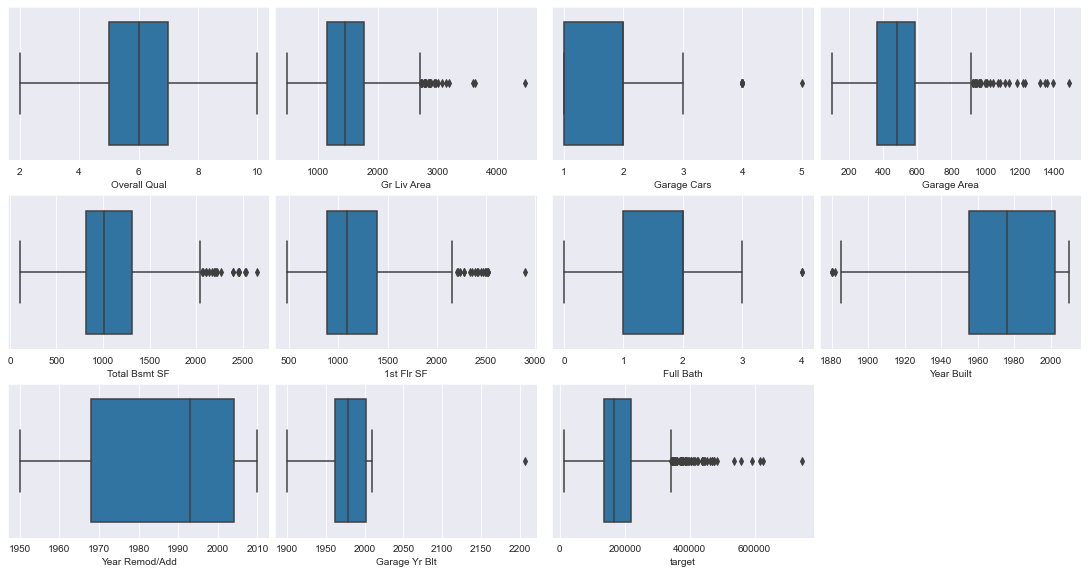

In [19]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(numeric_col)):
    plt.subplot( 4, 4, i+1 )
    sns.boxplot( train[numeric_col[i]] )

## 1. Ourliers

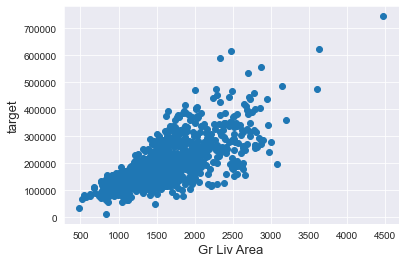

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['Gr Liv Area'], y = train['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

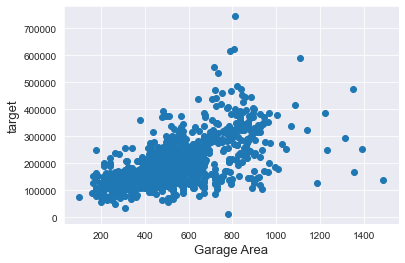

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = train['Garage Area'], y = train['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('Garage Area', fontsize=13)
plt.show()

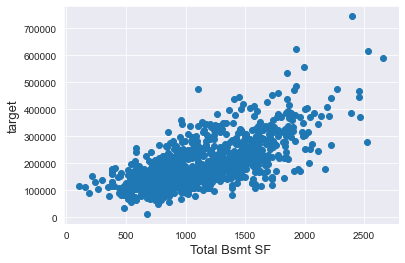

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['Total Bsmt SF'], y = train['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('Total Bsmt SF', fontsize=13)
plt.show()

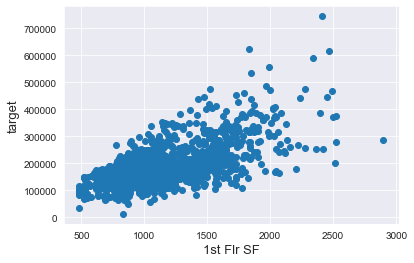

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = train['1st Flr SF'], y = train['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('1st Flr SF', fontsize=13)
plt.show()

특별히 제거할만한 이상치는 보이지 않음

## 2. Target Variable


 mu = 186406.31 and sigma = 78406.37



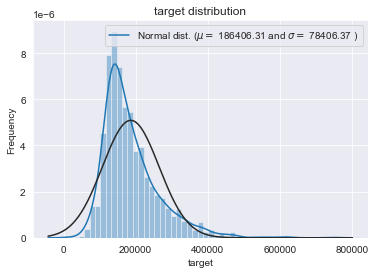

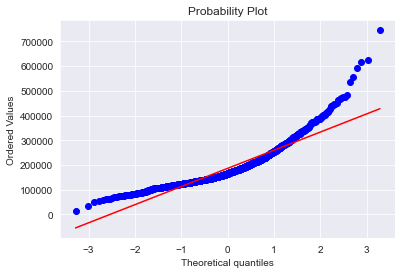

In [25]:
sns.distplot(train['target'] , fit=norm);

(mu, sigma) = norm.fit(train['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('target distribution')

fig = plt.figure()
res = stats.probplot(train['target'], plot=plt)
plt.show()

정규분포로 만들어주기 위해 log변환


 mu = 12.06 and sigma = 0.38



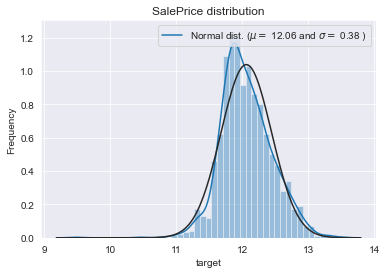

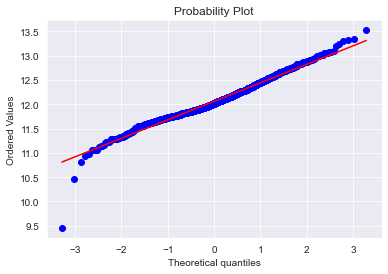

In [26]:
train["target"] = np.log1p(train["target"])

#Check the new distribution 
sns.distplot(train['target'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['target'], plot=plt)
plt.show()

## 3. Feature Engineering

### 1. Missing Data

In [28]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['target'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2700, 13)


In [30]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


결측치 없음

### 2. Correlation

<AxesSubplot:>

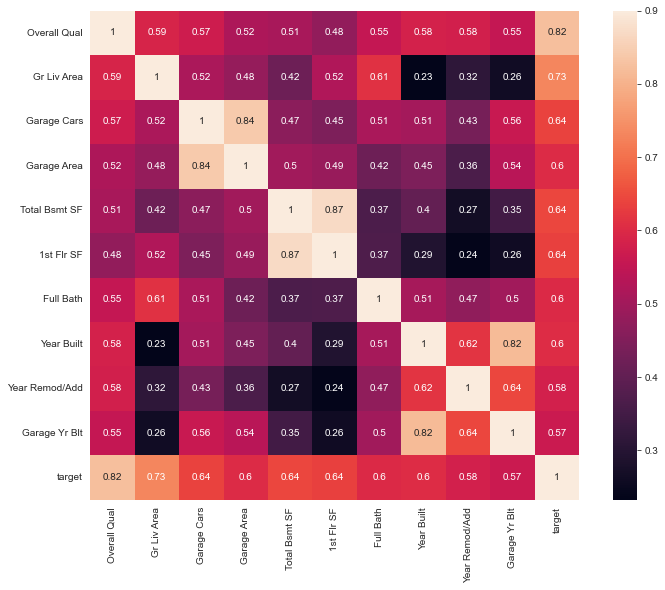

In [32]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

몇몇 변수들 간의 높은 상관관계가 보인다.

- Garage Cars ~ Garage Area
- Total Bsmt SF ~ 1st Flr SF
- Year Built ~ Garage Yr Built